Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-

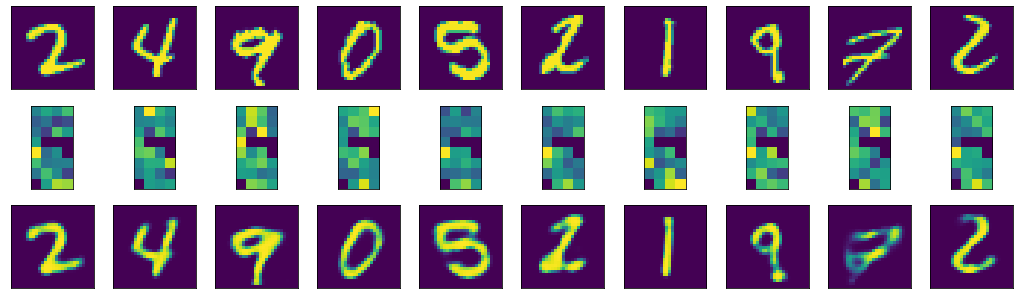

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense

(previsores_treinamento, _), (previsores_teste, _) = mnist.load_data()
previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:])))
previsores_teste = previsores_teste.reshape((len(previsores_teste), np.prod(previsores_teste.shape[1:])))

# 784 - 128 - 64 - 32 - 64 - 128 - 784
autoencoder = Sequential()

# Encode
autoencoder.add(Dense(units = 128, activation = 'relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation = 'relu'))
autoencoder.add(Dense(units = 32, activation = 'relu'))

# Decode
autoencoder.add(Dense(units = 64, activation = 'relu'))
autoencoder.add(Dense(units = 128, activation = 'relu'))
autoencoder.add(Dense(units = 784, activation = 'sigmoid'))

autoencoder.summary()

autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                    metrics = ['accuracy'
])
autoencoder.fit(previsores_treinamento, previsores_treinamento,
                epochs = 50, batch_size = 256, 
                validation_data = (previsores_teste, previsores_teste))

dimensao_original = Input(shape=(784,))
camada_encoder1 = autoencoder.layers[0]
camada_encoder2 = autoencoder.layers[1]
camada_encoder3 = autoencoder.layers[2]
encoder = Model(dimensao_original,
                camada_encoder3(camada_encoder2(camada_encoder1(dimensao_original))))
encoder.summary()

imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size = numero_imagens)
plt.figure(figsize=(18,18))
for i, indice_imagem in enumerate(imagens_teste):   
    # imagem original
    eixo = plt.subplot(10,10,i + 1)
    plt.imshow(previsores_teste[indice_imagem].reshape(28,28))
    plt.xticks(())
    plt.yticks(())

    print(previsores_teste[indice_imagem].shape)
    
    # imagem codificada
    eixo = plt.subplot(10,10,i + 1 + numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(8,4))
    plt.xticks(())
    plt.yticks(())
    
    print(imagens_codificadas[indice_imagem].shape)
    
     # imagem reconstruída
    eixo = plt.subplot(10,10,i + 1 + numero_imagens * 2)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(28,28))
    plt.xticks(())
    plt.yticks(())

    print(imagens_decodificadas[indice_imagem].shape)
    
